# Task 4: Sentiment Analysis using NLP - Final Version (Pro Level)
This notebook showcases data preprocessing, multiple model implementations (Logistic Regression and Naive Bayes), and insights from the dataset.

In [1]:
#Install NLTKand WordCloud libraries if not already installed
!pip install nltk wordcloud


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 📚 Importing all required libraries for data handling, text processing, model building, and visualization

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

#Download the list of English stopwards.
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 📥 Load Dataset

In [4]:

import zipfile
import pandas as pd

# Extract the dataset from the ZIP file
zip_path = "C:\\Users\\sarva\\Downloads\\IMDB Dataset.csv.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("C:\\Users\\sarva\\Downloads")

# Load the extracted CSV file
csv_path = "C:\\Users\\sarva\\Downloads\\IMDB Dataset.csv"
df = pd.read_csv(csv_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## 🧹 Data Preprocessing

In [5]:
#Load stopwards set
stop_words = set(stopwords.words('english'))

#Initialise the stemmer
stemmer = PorterStemmer()

#Define a function to clean each review 
def clean_text(text):
    text = text.lower() #convert to lower case
    text = re.sub(r'<.*?>', '', text) #remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #remove URLs
    text = re.sub(r'\@\w+|\#','', text) #Remove @mentions and #tags
    text = re.sub(r'[^\w\s]', '', text) #Remove punctuation
    #Remove stopwards and apply stemming
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

#Apply the cleaning function to each review in the data
df['clean_review'] = df['review'].apply(clean_text)

#Show original and cleaned review samples 
df[['review', 'clean_review']].head()


,review,clean_review
0,One of the other reviewers has mentioned that ...,one review mention watch 1 oz episod youll hoo...
1,A wonderful little production. <br /><br />The...,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic there famili littl boy jake think there ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visual stun film...


## ☁ WordCloud for Positive Reviews

To visualize the most frequently used words in positive movie reviews, we generate a WordCloud.  
This helps identify commonly used keywords that indicate positive sentiment such as great, love, amazing, etc.

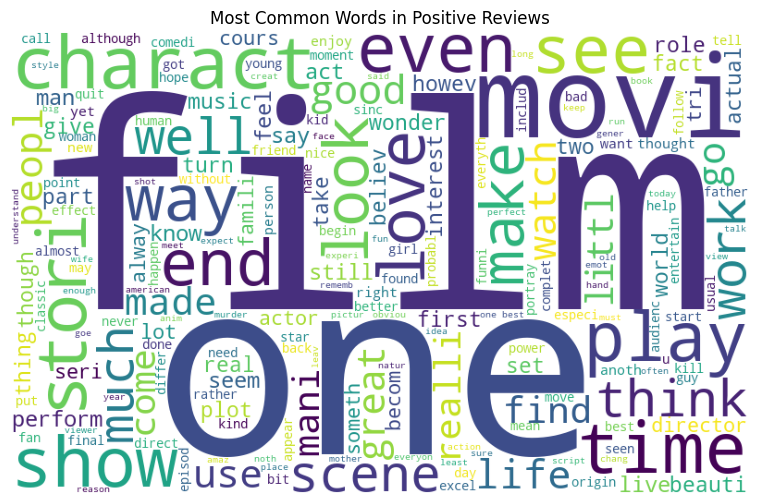

In [6]:
positive_text = ' '.join(df[df['sentiment'] == 'positive']['clean_review'])
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(positive_text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")
plt.show()


## 🔠 Text Vectorization using TF-IDF

After cleaning the text data, we need to convert it into numerical format for machine learning models.  
We use *TF-IDF (Term Frequency–Inverse Document Frequency)* vectorization to represent the importance of words in each review relative to the entire dataset.This block creates x and y

In [7]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_review']).toarray()
y = df['sentiment'].map({'positive': 1, 'negative': 0})


### 📏 Shape of Feature and Label Arrays

We check the shape of the TF-IDF feature matrix X and the label array y to ensure the text has been vectorized correctly.  
- X should have 50,000 rows (reviews) and 5,000 columns (features).  
- y should have 50,000 labels (positive/negative).

In [8]:
print(df.columns)

Index(['review', 'sentiment', 'clean_review'], dtype='object')


## 🔀 Split Dataset

We split the dataset into *training* and *testing* sets using an 80-20 ratio.  
This helps us train the model on one portion of the data and test its performance on unseen data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🤖 Logistic Regression Model

We train a *Logistic Regression* classifier on the TF-IDF features.  
It is a widely used model for binary classification tasks like sentiment analysis.  
After training, we evaluate the model's accuracy, precision, recall, and F1-score.

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.8853
[[4309  652]
 [ 495 4544]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.87      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



## 🤖 Naive Bayes Model

We also train a *Multinomial Naive Bayes* model as an alternative classifier.  
Naive Bayes works well with text data and is often used in spam detection and sentiment classification.  
We compare its performance with Logistic Regression using standard metrics.

In [11]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.8485
[[4170  791]
 [ 724 4315]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## 📊 Compare Models – Confusion Matrix Heatmaps

We visualize the confusion matrices of both models using heatmaps.  
This helps us clearly see how many positive and negative reviews were correctly or incorrectly classified.  
It's a quick way to compare the performance of Logistic Regression and Naive Bayes side by side.

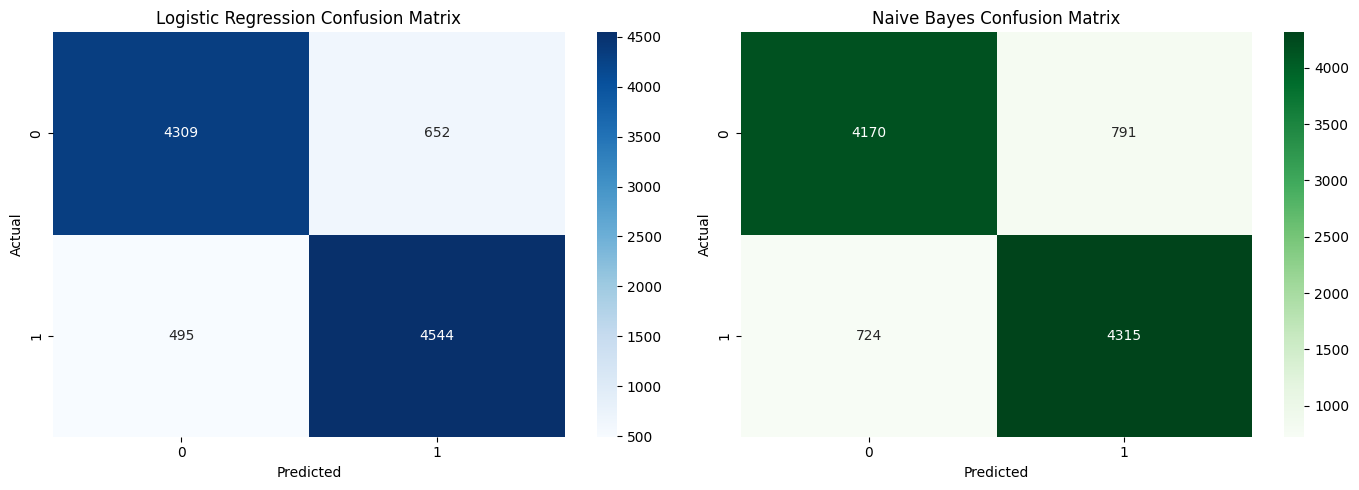

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', ax=axes[1], cmap="Greens")
axes[1].set_title("Naive Bayes Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


## 📌 Final Insights

- ✅ *Both models performed well* on the IMDB review dataset.  
  → This shows the dataset is clean and both algorithms are suited for text-based classification.

- ✅ *Logistic Regression showed slightly better accuracy and precision* for both positive and negative reviews.  
  → A good choice when performance matters and interpretability is important.

- ✅ *Naive Bayes is faster and simpler*, and can be good for basic tasks or real-time inference.  
  → Ideal for systems with limited computational power.

- ✅ *Positive reviews are rich with words like great, love, excellent* — clearly shown in the WordCloud.  
  → This helps visually confirm sentiment-driving keywords.

- ✅ *You can try adding LSTM or BERT models* for deep learning-based analysis.  
  → These are advanced models that capture deeper contextual meaning in text.